In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astsadata
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_process import arma_generate_sample

In [3]:
#Generating arma's (2,1) process
ar_params=[-0.75,0.25]     #Coeffs=-1*ar_params
ma_params=[0.65]
X=arma_generate_sample([1]+ar_params,[1]+ma_params,1000)

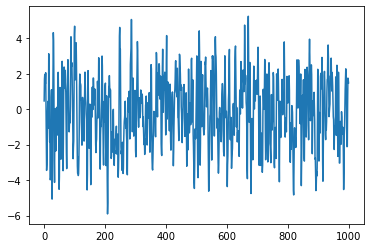

In [5]:
plt.plot(np.arange(1000),X)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


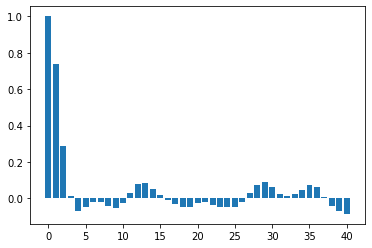

<BarContainer object of 41 artists>

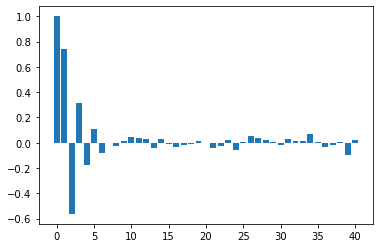

In [6]:
#plotting acf and pacf
acf_data=acf(X,nlags=40)
pacf_data=pacf(X,nlags=40)
plt.bar(np.arange(41),acf_data)
plt.show()
plt.bar(np.arange(41),pacf_data)

In [7]:
#Storing the expected orders
orders=[(i,0,j) for i in range(5) for j in range(3)]

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [10]:
#Storing the models for all the expected orders
fitted_model=[]
for i in range(len(orders)):
    fitted_model.append(ARIMA(X,order=orders[i],trend='n'))

In [11]:
#Storing the fitted models
fitted_model_results=[]
for i in range(len(orders)):
    fitted_model_results.append(fitted_model[i].fit())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [13]:
#Printing the summary of first model
fitted_model_results[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1619.234
Date:                Wed, 02 Mar 2022   AIC                           3242.468
Time:                        15:21:19   BIC                           3252.284
Sample:                             0   HQIC                          3246.199
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8730      0.016     55.932      0.000       0.842       0.904
sigma2         1.4906      0.071     21.052      0.000       1.352       1.629
===================================================================================
Ljung-Box (L1) (Q):                 204.96   Jarque-Bera (JB):                 3.18
Prob(Q):                              0.00   Prob(JB):                         0.20
Heteroskedasticity (H):               0.86   Skew:                            -0.06
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#Printing the AIC for each model
for i in range(len(orders)):
    print("AIC:",fitted_model_results[i].aic,orders[i])

AIC: 4177.444004124704 (0, 0, 0)
AIC: 3242.4680047627917 (0, 0, 1)
AIC: 2915.027644184106 (0, 0, 2)
AIC: 3391.7816935256587 (1, 0, 0)
AIC: 2929.399615170839 (1, 0, 1)
AIC: 2879.4434523646732 (1, 0, 2)
AIC: 3019.10355023992 (2, 0, 0)
AIC: 2874.188830322217 (2, 0, 1)
AIC: 2875.430881694556 (2, 0, 2)
AIC: 2919.1738925686104 (3, 0, 0)
AIC: 2875.5351669381057 (3, 0, 1)
AIC: 2878.006117644176 (3, 0, 2)
AIC: 2891.6264343949106 (4, 0, 0)
AIC: 2877.43156592544 (4, 0, 1)
AIC: 2879.519113299196 (4, 0, 2)


In [16]:
print(fitted_model_results[8].summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1432.715
Date:                Wed, 02 Mar 2022   AIC                           2875.431
Time:                        15:24:52   BIC                           2899.970
Sample:                             0   HQIC                          2884.757
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6872      0.127      5.407      0.000       0.438       0.936
ar.L2         -0.2412      0.077     -3.116      0.002      -0.393      -0.090
ma.L1          0.7189      0.129      5.581      0.0

In [17]:
#Importing the data
import pandas as pd
data=pd.read_csv('discoveries.csv')

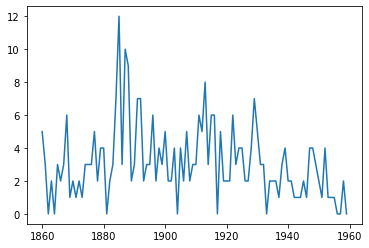

In [19]:
plt.plot(data['time'],data['discoveries'])

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


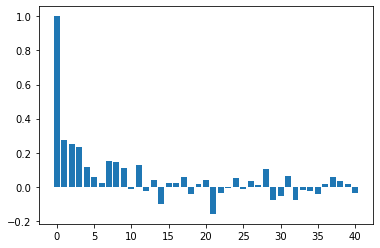

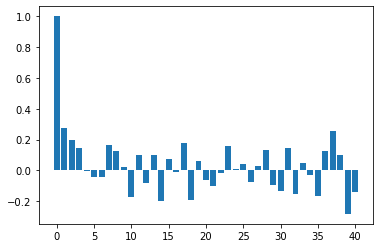

In [20]:
#plotting acf and pacf
pacf_data=pacf(data['discoveries'],nlags=40)
acf_data=acf(data['discoveries'],nlags=40)
plt.bar(np.arange(41),acf_data)
plt.show()
plt.bar(np.arange(41),pacf_data)
plt.show()

In [21]:
#Storing the expected orders
orders=[(i,0,j) for i in range(4) for j in range(4)]

In [22]:
#Storing the models for all the expected orders
fitted_model=[]
for i in range(len(orders)):
    fitted_model.append(ARIMA(data['discoveries'],order=orders[i],trend='n'))

In [23]:
#Storing the fitted models
fitted_model_results=[]
for i in range(len(orders)):
    fitted_model_results.append(fitted_model[i].fit())

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
#Printing the AIC for each model
for i in range(len(orders)):
    print("AIC:",fitted_model_results[i].aic,orders[i])

AIC: 554.163457494251 (0, 0, 0)
AIC: 514.4735396645741 (0, 0, 1)
AIC: 498.73165651112186 (0, 0, 2)
AIC: 482.96620425851967 (0, 0, 3)
AIC: 473.2915242019281 (1, 0, 0)
AIC: 443.22016329762573 (1, 0, 1)
AIC: 444.93273277160944 (1, 0, 2)
AIC: 446.52731540443796 (1, 0, 3)
AIC: 457.1852433276294 (2, 0, 0)
AIC: 444.86819219399814 (2, 0, 1)
AIC: 441.8517065760468 (2, 0, 2)
AIC: 443.84078657429296 (2, 0, 3)
AIC: 451.18181155925095 (3, 0, 0)
AIC: 446.2081312937225 (3, 0, 1)
AIC: 443.8330950440312 (3, 0, 2)
AIC: 450.3428390017127 (3, 0, 3)


In [25]:
#Model with minimum aic value
print(fitted_model_results[10].summary())

                               SARIMAX Results                                
Dep. Variable:            discoveries   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -215.926
Date:                Wed, 02 Mar 2022   AIC                            441.852
Time:                        15:33:19   BIC                            454.878
Sample:                             0   HQIC                           447.124
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1331      0.077      1.720      0.085      -0.019       0.285
ar.L2          0.8477      0.077     11.026      0.000       0.697       0.998
ma.L1          0.1787     27.187      0.007      0.9